In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Positive ionization

In [2]:
# load in the datasets
Acr = pd.read_excel(r'/Users/Shrini/Desktop/Australia_2023_Data/Metabolites/Acropora_Peak_Pos_w_Stats.xlsx')  
Sty = pd.read_excel(r'/Users/Shrini/Desktop/Australia_2023_Data/Metabolites/Sty_Peak_Pos_w_Stats.xlsx')  
Por = pd.read_excel(r'/Users/Shrini/Desktop/Australia_2023_Data/Metabolites/Porites_filtered_Peak_Pos_Stats.xlsx')
Acr

,compound,TP0_Acr-Amb_638-1,TP0_Acr-Amb_638-2,TP0_Acr-Amb_3007-1,TP0_Acr-Amb_3007-2,TP0_Acr-Amb_5070-1,TP0_Acr-Amb_5070-2,TP0_Acr-Hot_68-1,TP0_Acr-Hot_68-2,TP0_Acr-Hot_5013-1,...,FC_T0,pval_T0,ADJPVALUE_T0,FC_T1,pval_T1,ADJPVALUE_T1,FC_T2,pval_T2,ADJPVALUE_T2,compound.1
0,Glutathione disulfide,731.87,767.05,1918.30,2096.37,589.51,761.77,2713.95,1723.53,1457.50,...,-1.344698,0.859309,0.935130,1.337600,0.086007,0.217033,0.758123,0.273984,0.392119,Glutathione disulfide
1,Lysine,590225.06,678806.94,1099199.50,959109.44,1001539.69,542151.44,1012180.00,1019963.50,443737.34,...,-0.390550,0.393213,0.676692,1.137146,0.006451,0.036722,1.450778,0.010860,0.057403,Lysine
2,Arginine,2497549.25,2978655.25,3931046.75,3410905.25,3580398.75,1568827.38,4278976.00,3903695.25,1441031.62,...,-0.339910,0.545803,0.766781,1.086150,0.024334,0.081850,1.125268,0.005972,0.036828,Arginine
3,Ornithine,228262.38,317119.41,369248.00,281396.47,428914.91,171291.20,332601.09,280646.59,112176.35,...,-1.011345,0.070686,0.544362,-0.311223,0.514877,0.630852,0.510640,0.488737,0.623561,Ornithine
4,Phosphocholine,745526.81,843121.75,900682.44,833099.00,1216301.62,665985.69,977379.31,935965.94,311606.41,...,-1.138884,0.060661,0.544362,0.421604,0.116998,0.253288,0.753431,0.185652,0.298658,Phosphocholine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,L-Octanoylcarnitine,52300.61,52933.43,53542.11,70681.39,107266.04,106956.12,58448.07,46953.58,92159.73,...,0.149140,0.627543,0.825874,-0.027493,0.931188,0.975635,0.250369,0.265921,0.392119,L-Octanoylcarnitine
70,L-Palmitoylcarnitine,51586.18,67141.30,46189.72,35427.49,45601.94,26169.73,80164.94,52859.39,10834.62,...,-0.650454,0.430102,0.707279,0.188720,0.498633,0.630852,-0.741240,0.073807,0.170678,L-Palmitoylcarnitine
71,CDP-ethanolamine,34934.17,41772.43,42821.75,43471.98,45008.63,40971.75,69130.35,52385.83,45417.46,...,-0.002027,0.598497,0.805251,0.514390,0.225893,0.379911,0.348748,0.309306,0.416158,CDP-ethanolamine
72,Raffinose,595.41,0.00,1183.69,1128.46,581.76,1038.96,601.12,1193.50,720.90,...,1.775051,0.297502,0.613648,0.974901,0.181244,0.352949,-6.138587,0.082557,0.185127,Raffinose


In [20]:
# clean up the dataframes such that we only have metabolites shared between all 3 corals 
column_name = 'compound'

# Check if the column exists in all DataFrames
if column_name in Acr.columns and column_name in Sty.columns and column_name in Por.columns:
    # Filter rows that are common across all three DataFrames based on the particular column
    common_values = set(Acr[column_name]) & set(Sty[column_name]) & set(Por[column_name])

    df1_common = Acr[Acr[column_name].isin(common_values)]
    df2_common = Sty[Sty[column_name].isin(common_values)]
    df3_common = Por[Por[column_name].isin(common_values)]

    # Step 2: Update the original DataFrames
    Acr = df1_common.copy()
    Sty = df2_common.copy()
    Por = df3_common.copy()

    # Now, df1, df2, and df3 will only contain rows where the values in the specified column are common across all three DataFrames.
else:
    print(f"The column '{column_name}' is not present in all three DataFrames.")

In [21]:
Acr_subset = Acr[(Acr['ADJPVALUE_T1'] < 0.05) | (Acr['ADJPVALUE_T2'] < 0.05)]
Sty_subset = Sty[(Sty['ADJPVALUE_T1'] < 0.05)]
Por_subset = Por[(Por['ADJPVALUE_T1'] < 0.05) | (Por['ADJPVALUE_T2'] < 0.05)]
Por_subset

,Unnamed: 0,compound,TP0_Por-Amb_528-1,TP0_Por-Amb_528-2,TP0_Por-Amb_5384-1,TP0_Por-Amb_5384-2,TP0_Por-Amb_5387-1,TP0_Por-Amb_5387-2,TP0_Por-Hot_2732-1,TP0_Por-Hot_2732-2,...,TP2_Por-Hot_2287-2,FC_T0,pval_T0,ADJPVALUE_T0,FC_T1,pval_T1,ADJPVALUE_T1,FC_T2,pval_T2,ADJPVALUE_T2
1,2,Arginine,2549267.25,524505.56,3161163.75,1148008.38,6175714.00,9133071.00,481878.34,2164528.50,...,1908862.12,-1.301557,0.107884,0.334377,0.409719,0.832403,0.916904,2.786316,0.002400,0.028767
3,4,Phosphocholine,177127.83,396695.09,477482.25,367853.50,437637.84,386362.25,356721.84,459649.91,...,987622.50,-0.797309,0.103319,0.334377,1.030327,0.001685,0.027809,0.529585,0.133098,0.301292
4,6,Nicotinamide ribotide,1219.62,2123.11,2446.95,1042.98,5828.01,2363.98,771.62,1754.90,...,3707.67,-1.458341,0.066521,0.334377,1.410689,0.000336,0.022160,0.411587,0.314918,0.467626
5,7,CMP,0.00,2464.87,3889.03,1954.02,2515.22,2314.84,1139.19,1612.96,...,9816.13,0.241286,0.053169,0.334377,2.039730,0.001333,0.027809,1.378200,0.109116,0.266728
22,24,4-Aminobutyrate,263688.94,184454.75,132274.52,175738.48,153887.36,267367.62,136165.86,149829.89,...,624772.38,-0.324733,0.131235,0.360895,-0.389302,0.051580,0.261866,1.884836,0.001320,0.021784
29,31,Glycine,276445.47,172801.12,271817.25,321132.00,1037321.50,2503709.75,169170.30,317822.97,...,407993.38,-1.539235,0.174585,0.411523,0.313099,0.286374,0.540019,1.500511,0.002615,0.028767
32,34,Alanine,233007.81,180594.55,578545.25,531017.00,463740.16,422516.03,136283.17,222118.73,...,531139.50,-0.956297,0.052571,0.334377,-0.213389,0.518142,0.777212,1.695158,0.000526,0.017368
41,44,Cytidine,11229.79,18315.97,7478.00,28966.94,16645.35,11349.67,18639.12,11776.43,...,35645.63,0.311874,0.479554,0.688056,1.176605,0.000999,0.027809,1.558595,0.001037,0.021784
42,45,Phenylalanine,266657.66,313052.88,563501.56,631979.19,460494.75,291114.84,333399.66,468244.41,...,603400.50,-0.618391,0.111459,0.334377,0.478749,0.187705,0.427191,1.229486,0.003576,0.033715
62,70,L-Palmitoylcarnitine,24054.65,19199.91,79162.24,49420.22,36394.57,33264.82,46197.09,36836.23,...,18453.15,-0.271700,0.570636,0.757914,0.563654,0.123895,0.384788,-1.803810,0.000201,0.013256


# Metabolites of interest 
DB paper from 2023
1. Dipeptides 
2. Methionine 
3. Cysteine 
4. Hypotaurine 
5. Taurine 
6. CDP choline / phosphocholine
7. Ornithine 
8. Citrulline 
9. TCA Cycle and Amino acid story 

In [22]:
col_names = ["compound","FC_T0", "FC_T1", "FC_T2"]
df = Acr[col_names]


In [23]:
df = df.set_index(['compound'])
Gene_Transposed = df.transpose()
Gene_Transposed = Gene_Transposed.reset_index()
Gene_Transposed

compound,index,Lysine,Arginine,Ornithine,Phosphocholine,Nicotinamide ribotide,CMP,NG-dimethyl-L-arginine,S-adenosyl-L-methionine,CDP-Choline,...,Guanosine,N-acetyl-glutamine,Nicotinamide riboside,O-Butanoylcarnitine,O-Propanoylcarnitine,L-Octanoylcarnitine,L-Palmitoylcarnitine,CDP-ethanolamine,Raffinose,Inosine
0,FC_T0,-0.390550,-0.339910,-1.011345,-1.138884,-0.315712,0.436173,-1.266476,-1.066858,-0.270973,...,0.126454,-0.110792,-1.321550,-1.596782,-0.570597,0.149140,-0.650454,-0.002027,1.775051,0.057583
1,FC_T1,1.137146,1.086150,-0.311223,0.421604,0.442077,1.187001,0.218998,0.256544,2.105011,...,0.850114,0.173521,-0.455567,1.751154,1.330670,-0.027493,0.188720,0.514390,0.974901,1.103718
2,FC_T2,1.450778,1.125268,0.510640,0.753431,-0.814184,0.033270,1.569112,0.945017,0.734610,...,0.293826,-0.104545,-0.694657,2.622137,1.355963,0.250369,-0.741240,0.348748,-6.138587,0.084833


In [24]:
result = Gene_Transposed

In [25]:
result_T0 = result[result['index'].str.contains('T0')]
result_T0 = result_T0.assign(Time="0")

# for T2 

result_T1 = result[result['index'].str.contains('T1')]
result_T1 = result_T1.assign(Time="1")

# for T3
result_T2 = result[result['index'].str.contains('T2')]
result_T2 = result_T2.assign(Time="2")


frames = [result_T0, result_T1, result_T2]
df_wd = pd.concat(frames)
df_wd

compound,index,Lysine,Arginine,Ornithine,Phosphocholine,Nicotinamide ribotide,CMP,NG-dimethyl-L-arginine,S-adenosyl-L-methionine,CDP-Choline,...,N-acetyl-glutamine,Nicotinamide riboside,O-Butanoylcarnitine,O-Propanoylcarnitine,L-Octanoylcarnitine,L-Palmitoylcarnitine,CDP-ethanolamine,Raffinose,Inosine,Time
0,FC_T0,-0.390550,-0.339910,-1.011345,-1.138884,-0.315712,0.436173,-1.266476,-1.066858,-0.270973,...,-0.110792,-1.321550,-1.596782,-0.570597,0.149140,-0.650454,-0.002027,1.775051,0.057583,0
1,FC_T1,1.137146,1.086150,-0.311223,0.421604,0.442077,1.187001,0.218998,0.256544,2.105011,...,0.173521,-0.455567,1.751154,1.330670,-0.027493,0.188720,0.514390,0.974901,1.103718,1
2,FC_T2,1.450778,1.125268,0.510640,0.753431,-0.814184,0.033270,1.569112,0.945017,0.734610,...,-0.104545,-0.694657,2.622137,1.355963,0.250369,-0.741240,0.348748,-6.138587,0.084833,2


In [26]:
df_wd["species"] = "Acr"
df_wd

compound,index,Lysine,Arginine,Ornithine,Phosphocholine,Nicotinamide ribotide,CMP,NG-dimethyl-L-arginine,S-adenosyl-L-methionine,CDP-Choline,...,Nicotinamide riboside,O-Butanoylcarnitine,O-Propanoylcarnitine,L-Octanoylcarnitine,L-Palmitoylcarnitine,CDP-ethanolamine,Raffinose,Inosine,Time,species
0,FC_T0,-0.390550,-0.339910,-1.011345,-1.138884,-0.315712,0.436173,-1.266476,-1.066858,-0.270973,...,-1.321550,-1.596782,-0.570597,0.149140,-0.650454,-0.002027,1.775051,0.057583,0,Acr
1,FC_T1,1.137146,1.086150,-0.311223,0.421604,0.442077,1.187001,0.218998,0.256544,2.105011,...,-0.455567,1.751154,1.330670,-0.027493,0.188720,0.514390,0.974901,1.103718,1,Acr
2,FC_T2,1.450778,1.125268,0.510640,0.753431,-0.814184,0.033270,1.569112,0.945017,0.734610,...,-0.694657,2.622137,1.355963,0.250369,-0.741240,0.348748,-6.138587,0.084833,2,Acr


# do it for Porites

In [27]:
col_names = ["compound","FC_T0", "FC_T1", "FC_T2"]
df = Por[col_names]
#########
df = df.set_index(['compound'])
Gene_Transposed = df.transpose()
Gene_Transposed = Gene_Transposed.reset_index()
Gene_Transposed
result = Gene_Transposed

In [28]:
result_T0 = result[result['index'].str.contains('T0')]
result_T0 = result_T0.assign(Time="0")

# for T2 

result_T1 = result[result['index'].str.contains('T1')]
result_T1 = result_T1.assign(Time="1")

# for T3
result_T2 = result[result['index'].str.contains('T2')]
result_T2 = result_T2.assign(Time="2")


frames = [result_T0, result_T1, result_T2]
Por_df_wd = pd.concat(frames)
Por_df_wd
Por_df_wd["species"] = "Por"
Por_df_wd

compound,index,Lysine,Arginine,Ornithine,Phosphocholine,Nicotinamide ribotide,CMP,NG-dimethyl-L-arginine,S-adenosyl-L-methionine,CDP-Choline,...,Nicotinamide riboside,O-Butanoylcarnitine,O-Propanoylcarnitine,L-Octanoylcarnitine,L-Palmitoylcarnitine,CDP-ethanolamine,Raffinose,Inosine,Time,species
0,FC_T0,-1.008827,-1.301557,-1.785049,-0.797309,-1.458341,0.241286,-0.547126,-0.517928,-0.638017,...,0.109689,-0.218549,-0.945502,0.212295,-0.271700,-0.755578,0.216307,0.312104,0,Por
1,FC_T1,0.998567,0.409719,0.412437,1.030327,1.410689,2.039730,0.725093,0.772582,0.604744,...,0.417798,0.252793,0.502245,-0.110675,0.563654,0.582381,-1.630990,-0.713136,1,Por
2,FC_T2,1.347956,2.786316,0.339784,0.529585,0.411587,1.378200,1.247272,-0.780871,-0.414709,...,0.011235,-0.325768,0.861621,-0.121029,-1.803810,-0.368085,-1.749338,0.786845,2,Por


# do it for sty

In [29]:
col_names = ["compound","FC_T0", "FC_T1"]
df = Sty[col_names]
#########
df = df.set_index(['compound'])
Gene_Transposed = df.transpose()
Gene_Transposed = Gene_Transposed.reset_index()
Gene_Transposed
result = Gene_Transposed

In [30]:
result_T0 = result[result['index'].str.contains('T0')]
result_T0 = result_T0.assign(Time="0")

# for T2 

result_T1 = result[result['index'].str.contains('T1')]
result_T1 = result_T1.assign(Time="1")


frames = [result_T0, result_T1]
Sty_df_wd = pd.concat(frames)
Sty_df_wd
Sty_df_wd["species"] = "Sty"
Sty_df_wd

compound,index,Lysine,Arginine,Ornithine,Phosphocholine,Nicotinamide ribotide,CMP,NG-dimethyl-L-arginine,S-adenosyl-L-methionine,CDP-Choline,...,Nicotinamide riboside,O-Butanoylcarnitine,O-Propanoylcarnitine,L-Octanoylcarnitine,L-Palmitoylcarnitine,CDP-ethanolamine,Raffinose,Inosine,Time,species
0,FC_T0,0.710141,0.521895,0.273530,0.393112,0.934541,-0.401553,0.434476,0.878608,0.783665,...,0.621611,0.802695,0.230335,0.083823,0.765364,0.447772,2.052537,0.240630,0,Sty
1,FC_T1,1.005728,3.105679,1.276564,1.933679,0.757951,4.079711,1.394746,0.761474,0.310636,...,1.349165,1.590421,1.565312,-0.152540,-0.178120,0.752835,-0.273415,1.836346,1,Sty


# prepare dataset

In [31]:
# Concatenate the DataFrames vertically
concatenated_df_positive = pd.concat([df_wd, Sty_df_wd, Por_df_wd], ignore_index=True)


<AxesSubplot:xlabel='Time', ylabel='Glutathione disulfide'>

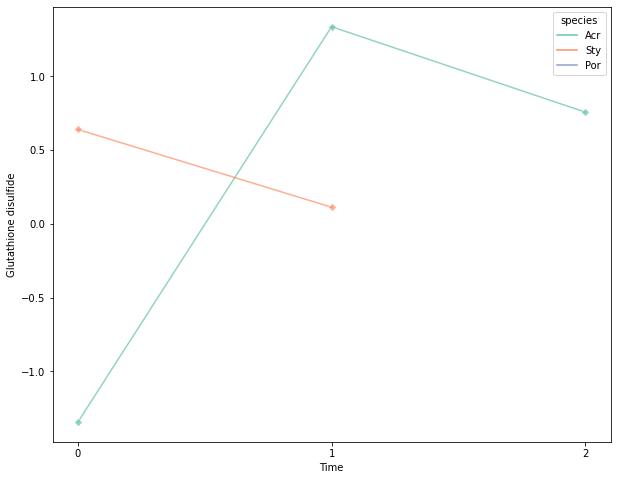

In [55]:
Name = "Glutathione disulfide" # RAN 

fig, ax = plt.subplots(figsize=(10, 8))

sns.lineplot(x = "Time",
              y = Name,
              data = concatenated_df,
              ax = ax,
              marker="D",
              palette="Set2",
              hue = "species",
              alpha = 0.7)

# Ready to plot 

1. Dipeptides 
2. Methionine 
3. Cysteine 
4. Hypotaurine 
5. Taurine 
6. CDP choline / phosphocholine
7. Ornithine 
8. Citrulline 
9. TCA Cycle and Amino acid story 


**Note: This is all for positive only. Need to prepare the negative dataset next**

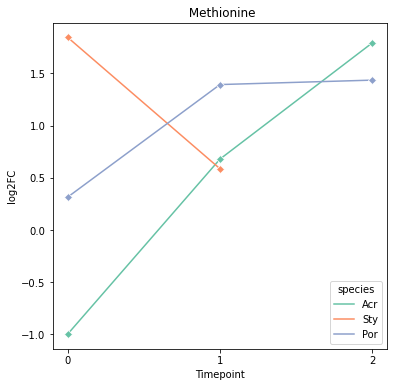

In [15]:
Name = "Methionine"
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the line
sns.lineplot(x="Time",
             y=Name,
             data=concatenated_df,
             ax=ax,
             marker="D",
             palette="Set2",
             hue="species",
             alpha=1)

plt.title(f" {Name}")

# Add x-axis and y-axis labels
plt.xlabel("Timepoint")
plt.ylabel("log2FC")


# Add title
plt.savefig("Methionine.pdf")
plt.show()
# Add comments to the plot



# Negative Ionization

In [2]:
# load in the datasets
Acr = pd.read_excel(r'/Users/Shrini/Desktop/Australia_2023_Data/Metabolites/Acr_Peak_Neg_w_Stats.xlsx')  
Sty = pd.read_excel(r'/Users/Shrini/Desktop/Australia_2023_Data/Metabolites/Sty_Neg_Filtered_w_Stats.xlsx')  
Por = pd.read_excel(r'/Users/Shrini/Desktop/Australia_2023_Data/Metabolites/Por_filtered_Peak_Neg_w_Stats.xlsx')
Acr

,Unnamed: 0,compound,TP0_Acr-Amb_638-1,TP0_Acr-Amb_638-2,TP0_Acr-Amb_3007-1,TP0_Acr-Amb_3007-2,TP0_Acr-Amb_5070-1,TP0_Acr-Amb_5070-2,TP0_Acr-Hot_68-1,TP0_Acr-Hot_68-2,...,TP2_Acr-Hot_2294-2,FC_T0,pval_T0,ADJPVALUE_T0,FC_T1,pval_T1,ADJPVALUE_T1,FC_T2,pval_T2,ADJPVALUE_T2
0,0,Glutathione disulfide,8013.87,11987.49,25484.06,8710.94,21026.42,3644.91,17626.60,9125.60,...,30542.68,-1.482611,0.134458,0.438123,1.601235,0.031840,0.089731,0.298787,0.438487,0.562602
1,1,Lysine,940163.69,1129712.00,1973278.50,1207674.38,1542117.12,741953.00,1109687.62,1359353.50,...,8000677.50,-0.498296,0.277543,0.461257,1.321840,0.005110,0.024909,1.652751,0.036521,0.123853
2,2,Trehalose-6-phosphate,2018.08,1018.39,717.68,764.36,NaN,NaN,12348.86,7847.25,...,642.59,NaN,0.250135,0.450041,NaN,0.207843,0.377017,NaN,0.724694,0.808918
3,3,Arginine,1153661.00,1469549.00,2084895.88,1512615.88,1374962.62,784186.69,1565692.62,1493899.00,...,2687307.25,-0.498026,0.258126,0.450041,1.177234,0.008150,0.035316,1.403179,0.000338,0.006600
4,4,Ornithine,314264.91,417015.41,551386.81,334585.88,504457.72,210176.95,404791.75,371913.59,...,612321.56,-0.827501,0.106965,0.438123,0.147510,0.629762,0.733156,0.731825,0.059538,0.165856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,74,Guanosine,480445.34,372855.66,786266.81,580796.00,468077.16,301909.38,354048.91,520537.75,...,1611039.00,0.078247,0.834236,0.916485,0.813964,0.036955,0.099396,0.270338,0.377313,0.525542
74,75,Xylose-5-phosphate,10014.05,16098.46,8888.91,4177.39,44491.33,7303.75,5063.33,8697.32,...,53651.14,-1.124825,0.205045,0.438123,0.726690,0.151305,0.302610,0.189757,0.420352,0.562602
75,76,Ribulose-5-phosphate,13610.91,20558.19,10902.54,7771.68,54344.08,7457.23,7455.52,12395.01,...,70870.37,-1.014561,0.211405,0.438123,0.943016,0.103276,0.236927,0.351051,0.346829,0.510427
76,77,Ribose phosphate,7523.92,14413.00,5954.34,4335.66,22136.98,3422.64,3776.11,6629.67,...,24124.42,-1.006106,0.219061,0.438123,NaN,0.081290,0.198144,0.777308,0.123251,0.259826


In [34]:
negative = concatenated_df_negative.transpose()
positive = concatenated_df_positive.transpose()

In [37]:
negative.reset_index()
positive.reset_index()

,compound,0,1,2,3,4,5,6,7
0,index,FC_T0,FC_T1,FC_T2,FC_T0,FC_T1,FC_T0,FC_T1,FC_T2
1,Lysine,-0.39055,1.137146,1.450778,0.710141,1.005728,-1.008827,0.998567,1.347956
2,Arginine,-0.33991,1.08615,1.125268,0.521895,3.105679,-1.301557,0.409719,2.786316
3,Ornithine,-1.011345,-0.311223,0.51064,0.27353,1.276564,-1.785049,0.412437,0.339784
4,Phosphocholine,-1.138884,0.421604,0.753431,0.393112,1.933679,-0.797309,1.030327,0.529585
...,...,...,...,...,...,...,...,...,...
64,CDP-ethanolamine,-0.002027,0.51439,0.348748,0.447772,0.752835,-0.755578,0.582381,-0.368085
65,Raffinose,1.775051,0.974901,-6.138587,2.052537,-0.273415,0.216307,-1.63099,-1.749338
66,Inosine,0.057583,1.103718,0.084833,0.24063,1.836346,0.312104,-0.713136,0.786845
67,Time,0,1,2,0,1,0,1,2


In [39]:
positive

,0,1,2,3,4,5,6,7
compound,,,,,,,,
index,FC_T0,FC_T1,FC_T2,FC_T0,FC_T1,FC_T0,FC_T1,FC_T2
Lysine,-0.39055,1.137146,1.450778,0.710141,1.005728,-1.008827,0.998567,1.347956
Arginine,-0.33991,1.08615,1.125268,0.521895,3.105679,-1.301557,0.409719,2.786316
Ornithine,-1.011345,-0.311223,0.51064,0.27353,1.276564,-1.785049,0.412437,0.339784
Phosphocholine,-1.138884,0.421604,0.753431,0.393112,1.933679,-0.797309,1.030327,0.529585
...,...,...,...,...,...,...,...,...
CDP-ethanolamine,-0.002027,0.51439,0.348748,0.447772,0.752835,-0.755578,0.582381,-0.368085
Raffinose,1.775051,0.974901,-6.138587,2.052537,-0.273415,0.216307,-1.63099,-1.749338
Inosine,0.057583,1.103718,0.084833,0.24063,1.836346,0.312104,-0.713136,0.786845


In [50]:
#merged_df = pd.merge(negative, positive, on='compound', how='outer', indicator=True)
#merged_df
# Filter the rows where the indicator column is 'left_only'
merged_df
only_negative = merged_df.loc[merged_df['_merge'] == 'left_only']
only_positive = merged_df.loc[merged_df['_merge'] == 'right_only']
only_positive
# Convert the result to a list
#not_shared_values_list = not_shared_values.tolist()

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,_merge
compound,,,,,,,,,,,,,,,,,
Phosphocholine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.138884,0.421604,0.753431,0.393112,1.933679,-0.797309,1.030327,0.529585,right_only
Nicotinamide ribotide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.315712,0.442077,-0.814184,0.934541,0.757951,-1.458341,1.410689,0.411587,right_only
NG-dimethyl-L-arginine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.266476,0.218998,1.569112,0.434476,1.394746,-0.547126,0.725093,1.247272,right_only
S-adenosyl-L-methionine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.066858,0.256544,0.945017,0.878608,0.761474,-0.517928,0.772582,-0.780871,right_only
CDP-Choline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.270973,2.105011,0.73461,0.783665,0.310636,-0.638017,0.604744,-0.414709,right_only
Glycerophosphocholine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.301077,1.294447,-0.093225,0.943747,2.489356,0.050236,-0.752531,-0.462455,right_only
Acetyllysine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.449397,0.068892,0.103929,0.498956,-0.218736,-0.729634,-0.033875,-0.527642,right_only
4-Aminobutyrate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.037858,0.613583,4.460446,-0.222118,0.716856,-0.324733,-0.389302,1.884836,right_only
Carnitine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.304798,0.136338,-0.015568,0.298068,0.060102,-0.15366,0.105863,-0.300261,right_only


# 27_12_2023

In [4]:
Acr
amino_acids = ['Alanine', 'Arginine', 'Asparagine', 'Aspartate', 'Cysteine', 'Glutamate',
               'Glutamine', 'Glycine', 'Histidine', 'Isoleucine', 'Leucine', 'Lysine',
               'Methionine', 'Phenylalanine', 'Proline', 'Serine', 'Threonine', 'Tryptophan',
               'Tyrosine', 'Valine']



In [9]:
# Create a regex pattern to match any of the amino acids
pattern = '|'.join(amino_acids)

# Use str.contains to filter rows containing amino acids
Acr_AA = Acr[Acr['compound'].str.contains(pattern)]
Sty_AA = Sty[Sty['compound'].str.contains(pattern)]
Por_AA = Por[Por['compound'].str.contains(pattern)]

,Unnamed: 0,compound,TP0_Por-Amb_528-1,TP0_Por-Amb_528-2,TP0_Por-Amb_5384-1,TP0_Por-Amb_5384-2,TP0_Por-Amb_5387-1,TP0_Por-Amb_5387-2,TP0_Por-Hot_2732-1,TP0_Por-Hot_2732-2,...,FC_T0,pval_T0,ADJPVALUE_T0,FC_T1,pval_T1,ADJPVALUE_T1,FC_T2,pval_T2,ADJPVALUE_T2,compound.1
0,1,Lysine,619658.69,332534.88,745712.25,513619.16,1868790.50,1011834.50,498943.91,1056795.88,...,-1.008827,0.147274,0.373850,0.998567,0.068037,0.313552,1.347956,0.015645,0.086048,Lysine
1,2,Arginine,2549267.25,524505.56,3161163.75,1148008.38,6175714.00,9133071.00,481878.34,2164528.50,...,-1.301557,0.107884,0.334377,0.409719,0.832403,0.916904,2.786316,0.002400,0.028767,Arginine
12,14,Lysine-Glutamine,555.35,528.75,2137.29,1875.34,3753.85,2568.05,839.43,1899.79,...,-2.402896,0.097273,0.334377,2.986437,0.016419,0.180610,1.682482,0.194074,0.382580,Lysine-Glutamine
14,16,Arginine-Glutamine,15017.86,12395.85,4998.79,20460.80,15671.22,39146.50,8181.36,6177.79,...,-0.100977,0.652952,0.815372,-1.396766,0.080763,0.313552,3.612067,0.024631,0.123347,Arginine-Glutamine
16,18,Aspartate,137643.02,352805.78,369503.34,360171.38,497822.62,390512.03,378561.09,414143.97,...,-0.484008,0.193859,0.432582,0.230143,0.481289,0.777212,-0.542851,0.076896,0.227915,Aspartate
17,19,Glutamate,1532958.00,2619582.00,2875151.25,3139628.75,3942002.00,3202690.75,2718473.00,2995420.00,...,-0.213611,0.457159,0.685738,0.396536,0.078828,0.313552,0.050934,0.763319,0.839651,Glutamate
19,21,Arginine-Alanine,5002.63,8245.78,11222.60,14970.34,21056.87,16618.24,19817.41,32142.73,...,-0.152620,0.940636,0.985429,0.521517,0.243521,0.502262,0.692098,0.197231,0.382580,Arginine-Alanine
23,25,Asparagine,61103.47,59772.80,126219.21,120901.73,466019.66,171164.61,71380.04,91244.87,...,-0.251142,0.879108,0.935825,0.188269,0.943386,0.945421,1.016074,0.011435,0.075472,Asparagine
24,26,Serine,199266.80,192291.08,802232.75,821935.31,268014.47,211060.30,161549.16,208998.25,...,-1.384270,0.076164,0.334377,0.432972,0.141696,0.384788,0.131132,0.483742,0.613980,Serine
25,27,Glutamine,1332910.12,1866669.50,1932312.00,1757507.00,3103515.00,4191786.00,1939853.88,2255369.50,...,-0.406616,0.202567,0.432582,-0.065800,0.798739,0.916904,0.514525,0.010106,0.074107,Glutamine


In [15]:
columns_to_keep = ['compound', 'FC_T0', 'pval_T0', 'ADJPVALUE_T0', 'FC_T1', 'pval_T1', 'ADJPVALUE_T1',
                   'FC_T2', 'pval_T2', 'ADJPVALUE_T2']

# Use loc to select the desired columns
Acr_AA_clean = Acr_AA.loc[:, columns_to_keep]
Por_AA_clean = Por_AA.loc[:, columns_to_keep]
columns_to_keep_sty = ['compound', 'FC_T0', 'pval_T0', 'ADJPVALUE_T0', 'FC_T1', 'pval_T1', 'ADJPVALUE_T1']
Sty_AA_clean = Sty_AA.loc[:, columns_to_keep_sty]
concatenated_df = pd.concat([Acr_AA_clean, Sty_AA_clean, Por_AA_clean], ignore_index=True)
concatenated_df

,compound,FC_T0,pval_T0,ADJPVALUE_T0,FC_T1,pval_T1,ADJPVALUE_T1,FC_T2,pval_T2,ADJPVALUE_T2
0,Lysine,-0.390550,0.393213,0.676692,1.137146,0.006451,0.036722,1.450778,0.010860,0.057403
1,Arginine,-0.339910,0.545803,0.766781,1.086150,0.024334,0.081850,1.125268,0.005972,0.036828
2,Lysine-Glutamine,-0.474360,0.301109,0.613648,3.403068,0.000337,0.004981,4.034121,0.001478,0.014746
3,Arginine-Glutamine,-0.746270,0.190085,0.578811,2.302375,0.003956,0.026612,2.135276,0.035310,0.113608
4,Aspartate,-0.195489,0.947940,0.987994,-0.027319,0.856997,0.932615,-0.137067,0.748249,0.814271
5,Glutamate,-0.346195,0.413711,0.695787,-0.043329,0.709539,0.795544,-0.432410,0.144465,0.248615
6,Arginine-Alanine,-0.462440,0.368864,0.649904,0.002776,0.936082,0.975635,0.234408,0.455039,0.590752
7,Asparagine,0.360530,0.289413,0.613648,1.397909,0.079631,0.210454,0.962859,0.129663,0.234026
8,Serine,0.128919,0.524960,0.761706,1.020250,0.002784,0.022888,1.132659,0.020137,0.080476
9,Glutamine,-0.266924,0.356293,0.646779,0.472575,0.011062,0.048152,0.930962,0.016510,0.076547


In [18]:
concatenated_df.to_csv("Amino_Acid_Metabolites.csv")